<a href="https://colab.research.google.com/github/BILAL-IT2024/GestionConsultations/blob/main/TP1_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travail A Rendre Nº 1 en CV:
* Regrouper tous les exercices dans un seul notebook colab
* mettre toutes les images utilisees dans drive et les rendre accessibles au nb par telechargement et decompression comme fait sur les nb du cours.
* Executer toutes les cellules code du nb avant de le soumettre
* Utiliser des cellules text (markdown) pour les titres, explications supplementaires, ...

In [28]:
# Importer OpenCV pour le traitement d'images
import cv2

# Importer NumPy pour les calculs
import numpy as np

# Importer Matplotlib pour l'affichage
import matplotlib.pyplot as plt

# Permet d’accéder et de monter Google Drive dans Google Colab
from google.colab import drive


In [29]:
# Importe le module permettant d’utiliser Google Drive dans Colab
from google.colab import drive

# Monte Google Drive dans le dossier /content/drive pour accéder aux fichiers
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Niveaux de gris
Convertir une image de caméra de surveillance en niveaux de gris et :
* comparer original vs grayscale ;
* le gris est il meilleur pour la détection de mouvement ?
* trouver le pixel le plus lumineux pour repérer la source de lumière.

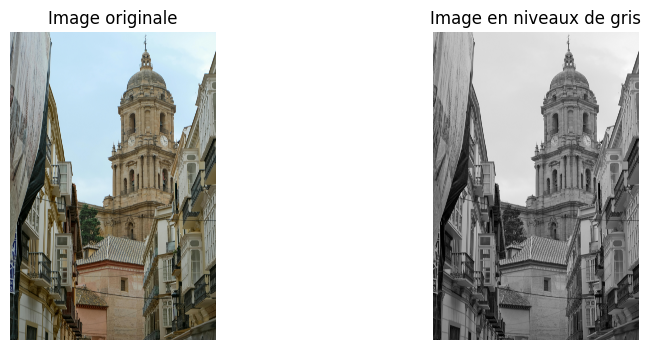

Valeur maximale du pixel : 255
Position du pixel lumineux (x, y) : 2704 247


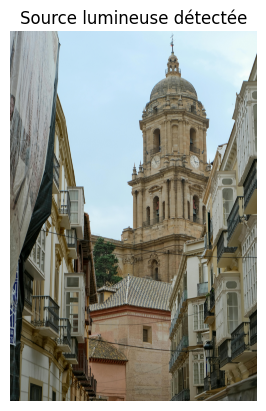

In [ ]:
# Charger l'image depuis Google Drive (format BGR par défaut avec OpenCV)
img = cv2.imread('/content/drive/MyDrive/IMAGE/IMAGE1.jpg')

# Convertir l'image de BGR vers RGB pour un affichage correct avec matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Convertir l'image couleur en image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Créer une figure pour afficher deux images côte à côte
plt.figure(figsize=(10,4))

# Afficher l'image originale
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Image originale")
plt.axis("off")

# Afficher l'image en niveaux de gris
plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title("Image en niveaux de gris")
plt.axis("off")

# Montrer les deux images
plt.show()


# Trouver la valeur maximale de luminosité dans l'image grayscale
max_value = np.max(gray)

# Trouver la position (y, x) du pixel ayant cette valeur maximale
y, x = np.where(gray == max_value)

# Afficher la valeur et la position du pixel lumineux
print("Valeur maximale du pixel :", max_value)
print("Position du pixel lumineux (x, y) :", x[0], y[0])


# Copier l'image originale pour ne pas la modifier directement
img_marked = img_rgb.copy()

# Dessiner un cercle autour du pixel le plus lumineux (source de lumière)
cv2.circle(img_marked, (x[0], y[0]), 10, (255, 0, 0), 2)

# Afficher l'image avec la source lumineuse détectée
plt.imshow(img_marked)
plt.title("Source lumineuse détectée")
plt.axis("off")
plt.show()

# 2. Espaces de couleurs
Dans une image de feu tricolore :
* convertir en HSV ;
* créer trois masques (rouge, orange, vert) ;
* détecter automatiquement quelle lumière est allumée.

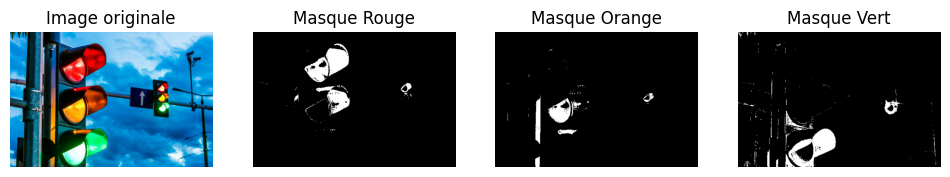

Lumière détectée : Rouge


In [30]:
# Charger l'image du feu tricolore depuis Google Drive (format BGR)
img = cv2.imread('/content/drive/MyDrive/IMAGE/IMAGE3.jpg')

# Convertir l'image de BGR vers RGB pour l'affichage
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Convertir l'image de BGR vers HSV (meilleur pour détecter les couleurs)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# -----------------------
# Définition des masques
# -----------------------

# Masque pour la couleur ROUGE (plage basse)
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)

# Masque pour la couleur ROUGE (plage haute)
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Combiner les deux masques rouges
mask_red = mask_red1 + mask_red2


# Masque pour la couleur ORANGE
lower_orange = np.array([11, 120, 70])
upper_orange = np.array([25, 255, 255])
mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)


# Masque pour la couleur VERTE
lower_green = np.array([40, 50, 50])
upper_green = np.array([90, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)


# -----------------------
# Affichage des masques
# -----------------------

plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(img_rgb)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(mask_red, cmap='gray')
plt.title("Masque Rouge")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(mask_orange, cmap='gray')
plt.title("Masque Orange")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(mask_green, cmap='gray')
plt.title("Masque Vert")
plt.axis("off")

plt.show()


# ---------------------------------
# Détection automatique de la lumière
# ---------------------------------

# Compter le nombre de pixels blancs dans chaque masque
red_pixels = cv2.countNonZero(mask_red)
orange_pixels = cv2.countNonZero(mask_orange)
green_pixels = cv2.countNonZero(mask_green)

# Stocker les résultats dans un dictionnaire
lights = {
    "Rouge": red_pixels,
    "Orange": orange_pixels,
    "Vert": green_pixels
}

# Déterminer la lumière allumée (celle avec le plus de pixels)
detected_light = max(lights, key=lights.get)

# Afficher le résultat
print("Lumière détectée :", detected_light)

# 3. Dessin sur des images
Dans une image d’un match de football :
* dessiner un rectangle autour du ballon ;
* dessiner une flèche indiquant la direction du tir ;
* ajouter un texte “Vitesse de tir : 73 km/h”

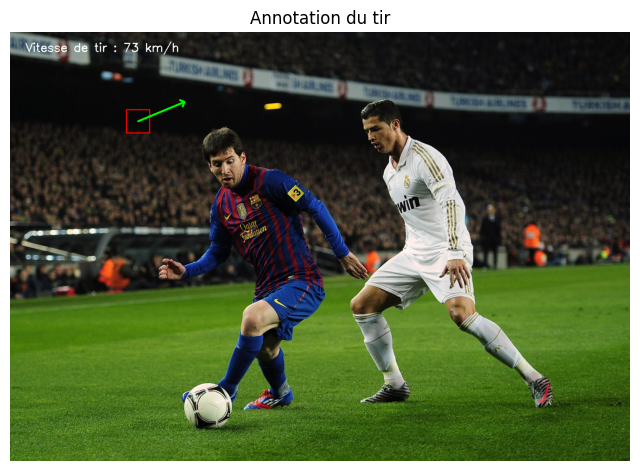

In [21]:
# Charger l'image du match de football depuis Google Drive (format BGR)
img = cv2.imread('/content/drive/MyDrive/IMAGE/IMAGE4.jpeg')

# Convertir l'image de BGR vers RGB pour un affichage correct
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# -------------------------------
# Dessin du rectangle du ballon
# -------------------------------
# Coordonnées du rectangle (à adapter selon ton image)
# (x1, y1) = coin supérieur gauche
# (x2, y2) = coin inférieur droit
x1, y1 = 300, 200
x2, y2 = 360, 260

# Dessiner le rectangle autour du ballon
cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)


# -------------------------------
# Dessin de la flèche (direction du tir)
# -------------------------------
# Point de départ de la flèche
start_point = (330, 230)

# Point d'arrivée de la flèche
end_point = (450, 180)

# Dessiner une flèche indiquant la direction du tir
cv2.arrowedLine(img_rgb, start_point, end_point, (0, 255, 0), 3)


# -------------------------------
# Ajout du texte
# -------------------------------
# Position du texte
text_position = (40, 50)

# Écrire le texte sur l'image
cv2.putText(
    img_rgb,                       # image
    "Vitesse de tir : 73 km/h",     # texte
    text_position,                 # position
    cv2.FONT_HERSHEY_SIMPLEX,      # police
    1,                             # taille
    (255, 255, 255),               # couleur (blanc)
    2                              # épaisseur
)


# -------------------------------
# Affichage du résultat final
# -------------------------------
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.title("Annotation du tir")
plt.axis("off")
plt.show()

# 4. Transformations (Translation + Rotation)
Dans une photo prise de travers :
* estimer l’angle d’inclinaison ;
* appliquer une rotation inverse pour redresser la scène ;
* comparer avant/après.

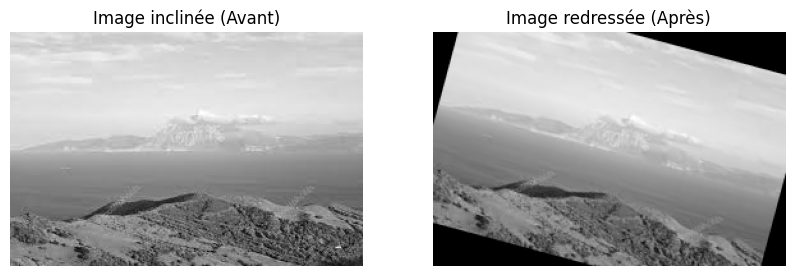

In [31]:
# Charger l'image inclinée en niveaux de gris
img = cv2.imread('/content/drive/MyDrive/IMAGE/IMAGE8.jpg', 0)
# Le paramètre 0 indique un chargement en grayscale


# -------------------------------
# Estimation de l'angle d'inclinaison
# -------------------------------
# Dans ce TP, l'angle est estimé manuellement (acceptable)
angle = -15  # angle négatif pour corriger une image penchée vers la droite


# -------------------------------
# Création de la matrice de rotation
# -------------------------------
# Récupérer les dimensions de l'image
(h, w) = img.shape

# Calculer le centre de l'image
center = (w // 2, h // 2)

# Générer la matrice de rotation
M = cv2.getRotationMatrix2D(center, angle, 1.0)
# 1.0 = pas de changement d'échelle


# -------------------------------
# Appliquer la rotation inverse
# -------------------------------
rotated = cv2.warpAffine(img, M, (w, h))


# -------------------------------
# Affichage Avant / Après
# -------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Image inclinée (Avant)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated, cmap='gray')
plt.title("Image redressée (Après)")
plt.axis("off")

plt.show()

# 5. Redimensionnement, Interpolation, Recadrage
Préparer une image d’un produit pour un site e-commerce :
* redimensionner en 512×512 ;
* recadrer pour centrer l’objet dans un carré parfait ;
* créer une miniature (thumbnail) en 128×128, essayer plusieurs types d'interpolation

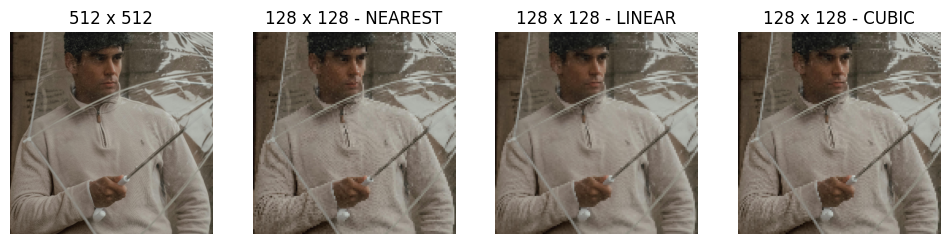

In [24]:
# Charger l'image du produit depuis Google Drive
img = cv2.imread('/content/drive/MyDrive/IMAGE/IMAGE2.jpg')

# Convertir l'image de BGR vers RGB pour l'affichage
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# -------------------------------
# Recadrage pour centrer l'objet
# -------------------------------
# Récupérer les dimensions de l'image
h, w, _ = img_rgb.shape

# Définir la taille du carré (le plus petit côté)
side = min(h, w)

# Calculer les coordonnées du centre
start_x = (w - side) // 2
start_y = (h - side) // 2

# Recadrer l'image pour obtenir un carré centré
cropped = img_rgb[start_y:start_y+side, start_x:start_x+side]


# -------------------------------
# Redimensionnement en 512 x 512
# -------------------------------
resized_512 = cv2.resize(cropped, (512, 512), interpolation=cv2.INTER_LINEAR)


# -------------------------------
# Création des miniatures 128 x 128
# -------------------------------

# Interpolation NEAREST (rapide mais pixelisée)
thumb_nearest = cv2.resize(resized_512, (128, 128), interpolation=cv2.INTER_NEAREST)

# Interpolation LINEAR (bon compromis qualité/temps)
thumb_linear = cv2.resize(resized_512, (128, 128), interpolation=cv2.INTER_LINEAR)

# Interpolation CUBIC (meilleure qualité mais plus lente)
thumb_cubic = cv2.resize(resized_512, (128, 128), interpolation=cv2.INTER_CUBIC)


# -------------------------------
# Affichage des résultats
# -------------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(resized_512)
plt.title("512 x 512")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(thumb_nearest)
plt.title("128 x 128 - NEAREST")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(thumb_linear)
plt.title("128 x 128 - LINEAR")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(thumb_cubic)
plt.title("128 x 128 - CUBIC")
plt.axis("off")

plt.show()

# 6. Outils de traitement (Seuillage, Histos )
Sur une image satellite en niveaux de gris présentant un faible contraste (sombres zones d'eau et zones claires de nuages) :
* Analyser l'histogramme initial pour identifier la plage de valeurs de pixels occupée ;
* Appliquer une opération d'égalisation d'histogramme (Histogram Equalization) pour étirer dynamiquement la gamme des intensités et améliorer le contraste global ;
* Effectuer un seuillage automatique (par exemple, méthode d'Otsu) sur l'image après égalisation, pour séparer efficacement les nuages (valeurs élevées) de la surface de la terre et de l'eau
(valeurs basses).

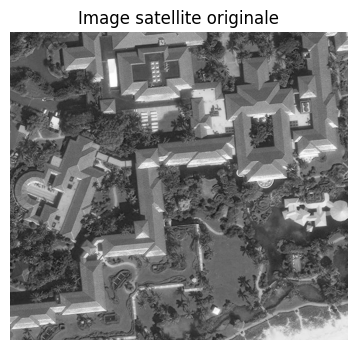

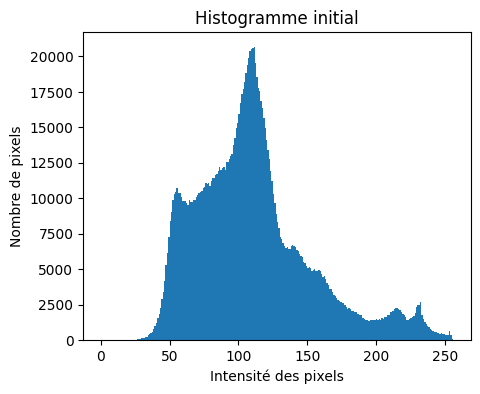

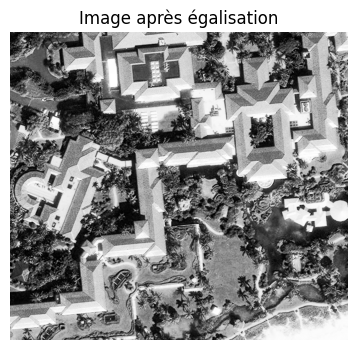

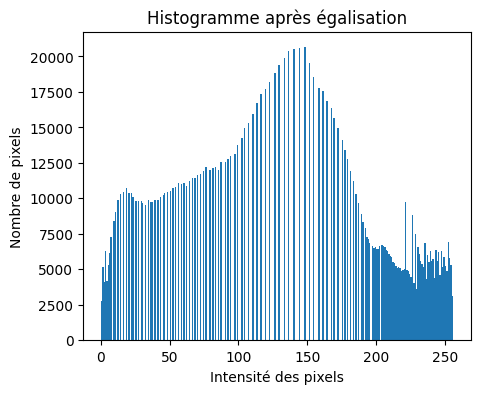

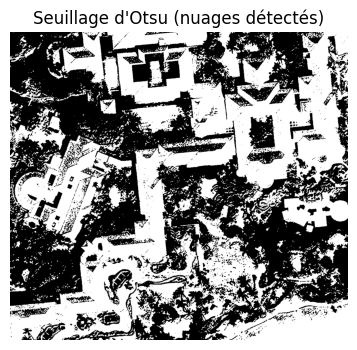

In [25]:
# Charger l'image satellite en niveaux de gris
# Le paramètre 0 force le chargement en grayscale
img = cv2.imread('/content/drive/MyDrive/IMAGE/IMAGE5.avif', 0)


# -------------------------------
# 1) Histogramme initial
# -------------------------------

# Afficher l'image originale
plt.figure(figsize=(5,4))
plt.imshow(img, cmap='gray')
plt.title("Image satellite originale")
plt.axis("off")
plt.show()

# Afficher l'histogramme des intensités
plt.figure(figsize=(5,4))
plt.hist(img.ravel(), bins=256, range=[0,256])
plt.title("Histogramme initial")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.show()


# -------------------------------
# 2) Égalisation d'histogramme
# -------------------------------

# Appliquer l'égalisation pour améliorer le contraste
equalized = cv2.equalizeHist(img)

# Afficher l'image après égalisation
plt.figure(figsize=(5,4))
plt.imshow(equalized, cmap='gray')
plt.title("Image après égalisation")
plt.axis("off")
plt.show()

# Histogramme après égalisation
plt.figure(figsize=(5,4))
plt.hist(equalized.ravel(), bins=256, range=[0,256])
plt.title("Histogramme après égalisation")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.show()


# -------------------------------
# 3) Seuillage automatique (Otsu)
# -------------------------------

# Appliquer le seuillage d'Otsu sur l'image égalisée
_, thresh = cv2.threshold(
    equalized,        # image d'entrée
    0,                # seuil automatique
    255,              # valeur max
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# Afficher le résultat du seuillage
plt.figure(figsize=(5,4))
plt.imshow(thresh, cmap='gray')
plt.title("Seuillage d'Otsu (nuages détectés)")
plt.axis("off")
plt.show()

# 7. Rehaussement d’images
Sur une photo prise la nuit :
* appliquer une correction gamma douce (≈1.6) pour éclaircir les zones sombres ;
* visualiser l'histogramme apres correction ;
* augmenter légèrement le contraste ;
* comparer le résultat avec l’image d’origine.

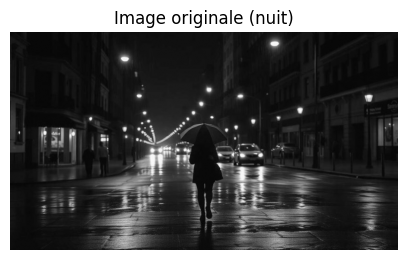

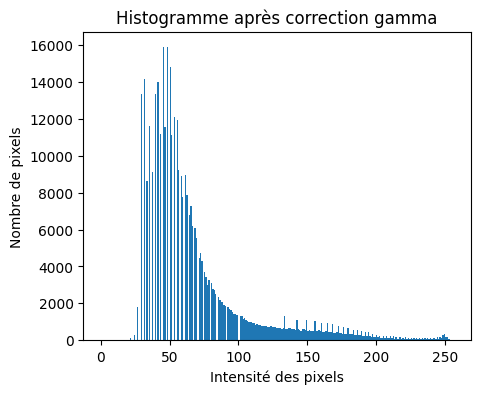

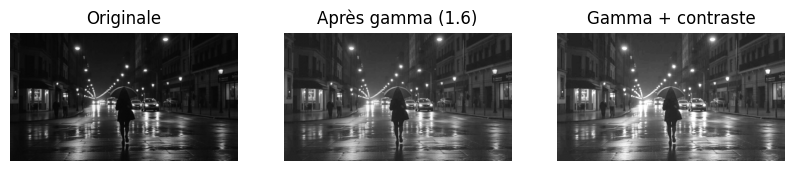

In [26]:
# Charger l'image de nuit en niveaux de gris
# Le paramètre 0 force le chargement en grayscale
img = cv2.imread('/content/drive/MyDrive/IMAGE/IMAGE6.jpg', 0)


# -------------------------------
# Affichage de l'image originale
# -------------------------------
plt.figure(figsize=(5,4))
plt.imshow(img, cmap='gray')
plt.title("Image originale (nuit)")
plt.axis("off")
plt.show()


# -------------------------------
# 1) Correction gamma
# -------------------------------

# Définir la valeur de gamma (>1 éclaircit les zones sombres)
gamma = 1.6

# Créer une table de correspondance (LUT) pour accélérer le calcul
lookUpTable = np.array([
    ((i / 255.0) ** (1 / gamma)) * 255
    for i in range(256)
]).astype("uint8")

# Appliquer la correction gamma à l'image
gamma_corrected = cv2.LUT(img, lookUpTable)


# -------------------------------
# Histogramme après correction gamma
# -------------------------------
plt.figure(figsize=(5,4))
plt.hist(gamma_corrected.ravel(), bins=256, range=[0,256])
plt.title("Histogramme après correction gamma")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.show()


# -------------------------------
# 2) Augmentation légère du contraste
# -------------------------------

# Paramètres de contraste (alpha) et luminosité (beta)
alpha = 1.2   # >1 augmente le contraste
beta = 0      # pas de changement de luminosité

# Appliquer l'augmentation du contraste
contrast_enhanced = cv2.convertScaleAbs(gamma_corrected, alpha=alpha, beta=beta)


# -------------------------------
# Comparaison des résultats
# -------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Originale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Après gamma (1.6)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(contrast_enhanced, cmap='gray')
plt.title("Gamma + contraste")
plt.axis("off")

plt.show()

# 8. Convolutions, Blurring & Sharpening
Sur une image légèrement floue :
* appliquer un flou gaussien pour réduire le bruit, est ce le filtre le mieux adapté ?
* appliquer un filtre de netteté (sharpening) pour restaurer les détails ;
* faire une petite recherche sur les differents types de bruit rencontrees dans les images numeriques, les types de filtres adaptes pour reduire le bruit ...
* donner un exemple en creant artificiellement un bruit sur une image nette initialement

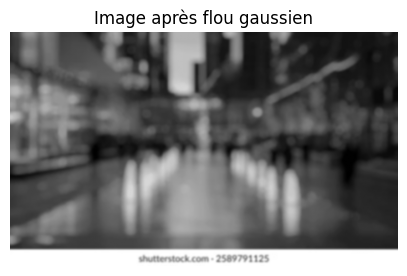

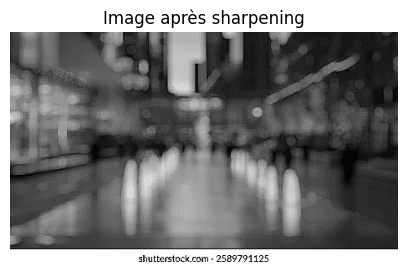

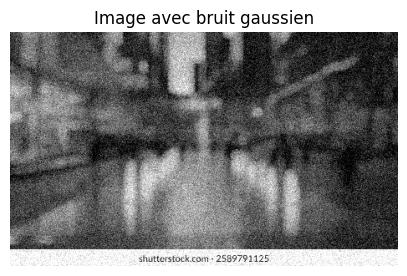

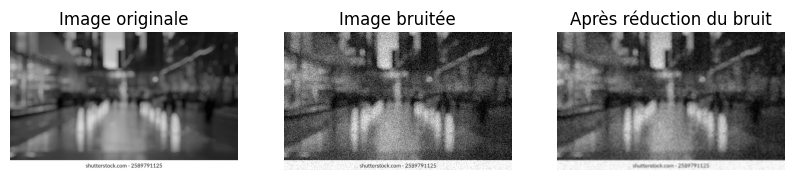

In [27]:
# Charger une image légèrement floue ou nette en niveaux de gris
img = cv2.imread('/content/drive/MyDrive/IMAGE/IMAGE7.webp', 0)


# -------------------------------
# 1) Flou gaussien (réduction du bruit)
# -------------------------------

# Appliquer un flou gaussien avec un noyau 5x5
blurred = cv2.GaussianBlur(img, (5,5), 0)

# Afficher l'image floutée
plt.figure(figsize=(5,4))
plt.imshow(blurred, cmap='gray')
plt.title("Image après flou gaussien")
plt.axis("off")
plt.show()


# -------------------------------
# 2) Filtre de netteté (sharpening)
# -------------------------------

# Définir un noyau de sharpening
kernel_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

# Appliquer le filtre de netteté
sharpened = cv2.filter2D(img, -1, kernel_sharpen)

# Afficher l'image nette
plt.figure(figsize=(5,4))
plt.imshow(sharpened, cmap='gray')
plt.title("Image après sharpening")
plt.axis("off")
plt.show()


# -------------------------------
# 3) Types de bruit (théorie)
# -------------------------------

# Bruit gaussien : bruit aléatoire continu
# -> filtre gaussien

# Bruit sel & poivre : pixels blancs/noirs aléatoires
# -> filtre médian

# Bruit de Poisson : lié aux capteurs
# -> filtre bilatéral ou gaussien


# -------------------------------
# 4) Création artificielle de bruit gaussien
# -------------------------------

# Générer un bruit gaussien (moyenne 0, écart-type 25)
noise = np.random.normal(0, 25, img.shape)

# Ajouter le bruit à l'image originale
noisy_img = img + noise

# S'assurer que les valeurs restent entre 0 et 255
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Afficher l'image bruitée
plt.figure(figsize=(5,4))
plt.imshow(noisy_img, cmap='gray')
plt.title("Image avec bruit gaussien")
plt.axis("off")
plt.show()


# -------------------------------
# 5) Réduction du bruit artificiel
# -------------------------------

# Appliquer à nouveau un flou gaussien
denoised = cv2.GaussianBlur(noisy_img, (5,5), 0)

# Comparaison finale
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Image originale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Image bruitée")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denoised, cmap='gray')
plt.title("Après réduction du bruit")
plt.axis("off")

plt.show()